In [167]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    


In [168]:
# load data set from sklearn
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [169]:
print(breast_cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [170]:
print(breast_cancer_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [171]:
# convert the data using pandas dataframe
cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

In [172]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [173]:
cancer_df.shape

(569, 30)

In [174]:
# there is no label column in this data set
cancer_df['label'] = breast_cancer_data.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [175]:
# check for null values
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [176]:
# sepparate features and labels
X = cancer_df.drop(columns='label', axis=1)
Y = cancer_df['label']

In [177]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [178]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(569, 30) (455, 30) (114, 30)
(569,) (455,) (114,)


In [179]:
# apply standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [180]:
print(X_train)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


**Building Neural Networks**

In [181]:
# import the libraries
import tensorflow as tf
tf.random.set_seed(3)  # good for reproducibility without this code we can get different results each time we run the code
from tensorflow import keras 


In [182]:
# stetting up the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # here we are giving 30 because we have 30 features
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(30, activation='sigmoid'),
    keras.layers.Dense(2, activation='sigmoid')  # here we are giving 2 because we have two classes( benign and malignant)
    
])


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [183]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # we are using catagorical_crossentropy because we have two classes
              metrics=['accuracy'])


In [184]:

# train the model
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10) # validation_split=0.1 means 10% of the data will be used for validation

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6500 - loss: 0.7042 - val_accuracy: 0.6522 - val_loss: 0.6218
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6567 - loss: 0.5896 - val_accuracy: 0.7174 - val_loss: 0.5202
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7466 - loss: 0.4984 - val_accuracy: 0.8261 - val_loss: 0.4275
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8956 - loss: 0.4147 - val_accuracy: 0.9130 - val_loss: 0.3446
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9159 - loss: 0.3396 - val_accuracy: 0.9348 - val_loss: 0.2776
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9260 - loss: 0.2796 - val_accuracy: 0.9348 - val_loss: 0.2279
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9229 - loss: 0.2343 - val_accuracy: 0.9565 - val_loss: 0.1912
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9294 - loss: 0.1999 - val_accuracy: 0.9565 - val_loss

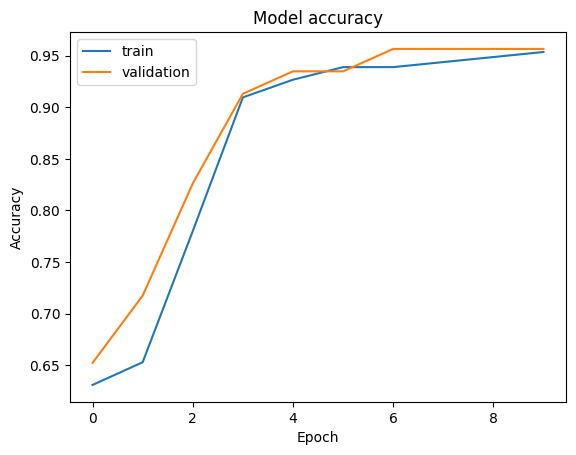

In [185]:
# visualize the loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

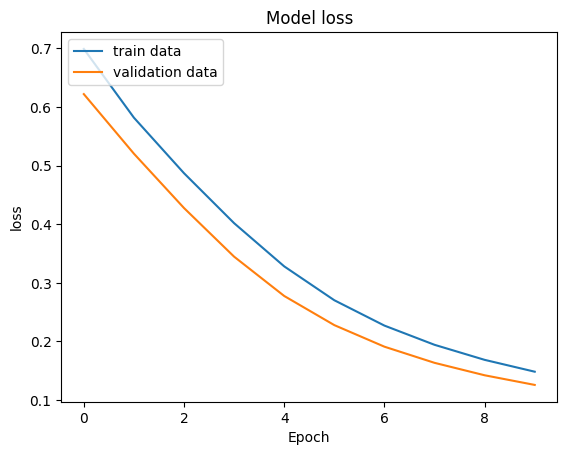

In [186]:
# visualize the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

plt.legend(['train data', 'validation data'], loc='upper left')
plt.show()

In [187]:
# test the model on test data
#X_test = scaler.transform(X_test)

test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9728 - loss: 0.1336 
Test loss:  0.1333983838558197
Test accuracy:  0.9736841917037964


In [188]:
print(model.predict(X_test))
print(Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.32336172 0.8052641 ]
 [0.6069956  0.68108374]
 [0.15637183 0.90779835]
 [0.9426687  0.24870907]
 [0.5786621  0.7335133 ]
 [0.93180287 0.28117532]
 [0.3473334  0.8231239 ]
 [0.17947534 0.9058493 ]
 [0.24363343 0.86884564]
 [0.22671519 0.88196224]
 [0.48964557 0.7371419 ]
 [0.26879227 0.8300384 ]
 [0.28637573 0.83993995]
 [0.33663374 0.81584346]
 [0.20011418 0.8912496 ]
 [0.88503724 0.4218589 ]
 [0.16414165 0.9029601 ]
 [0.21010372 0.8697571 ]
 [0.23965216 0.8813643 ]
 [0.9274909  0.30545664]
 [0.32849497 0.7460536 ]
 [0.17130226 0.9005785 ]
 [0.18411021 0.88669056]
 [0.18521327 0.900069  ]
 [0.3304293  0.8427312 ]
 [0.9028781  0.36664155]
 [0.2797829  0.8484607 ]
 [0.41440672 0.7786556 ]
 [0.8931833  0.40503985]
 [0.9038903  0.34980974]
 [0.30729675 0.8445372 ]
 [0.25492483 0.85649246]
 [0.22765222 0.88428146]
 [0.936584   0.2497147 ]
 [0.9218049  0.30495915]
 [0.2688354  0.8201953 ]
 [0.14537527 0.9066263 ]
 [0.32493782 0.8087835 ]
 [0.16589685

In [189]:
print(X_test.shape)
print(X_test[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [190]:
Y_predict = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [191]:
print(Y_predict.shape)
print(Y_predict[0])

(114, 2)
[0.32336172 0.8052641 ]


In [196]:
# convert the prediction to 0 or 1
Y_predict_label = [np.argmax(i) for i in Y_predict]  # we use here argmax because we get the probability of each class and we want to get the class with the highest probability
print(Y_predict.shape)
print(Y_predict_label[:10])

(114, 2)
[np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


In [193]:
print(Y_test[:10])

528    1
291    1
467    1
108    0
340    1
256    0
160    1
306    1
155    1
511    1
Name: label, dtype: int64


In [200]:
# create a predictive system
input_data = (9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)
# change to numpy array
input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
print(input_data_as_numpy_array.shape)
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)  # the rason for reshaping is the model expects a 2D array bcs the trained data expects a 2D array
print(input_data_reshaped)
print(input_data_reshaped.shape)

# standardize the input data
std_data = scaler.transform(input_data_reshaped.reshape(1,-1))

# prediction
prediction = model.predict(std_data)
print(prediction)

# convert the prediction to 0 or 1
prediction_label = [np.argmax(i) for i in prediction]
print(prediction_label)

# print the prediction
if prediction_label[0] == 0:
    print('The object is a Malignant')
else:
    print('The object is a Benign')
    

[9.504e+00 1.244e+01 6.034e+01 2.739e+02 1.024e-01 6.492e-02 2.956e-02
 2.076e-02 1.815e-01 6.905e-02 2.773e-01 9.768e-01 1.909e+00 1.570e+01
 9.606e-03 1.432e-02 1.985e-02 1.421e-02 2.027e-02 2.968e-03 1.023e+01
 1.566e+01 6.513e+01 3.149e+02 1.324e-01 1.148e-01 8.867e-02 6.227e-02
 2.450e-01 7.773e-02]
(30,)
[[9.504e+00 1.244e+01 6.034e+01 2.739e+02 1.024e-01 6.492e-02 2.956e-02
  2.076e-02 1.815e-01 6.905e-02 2.773e-01 9.768e-01 1.909e+00 1.570e+01
  9.606e-03 1.432e-02 1.985e-02 1.421e-02 2.027e-02 2.968e-03 1.023e+01
  1.566e+01 6.513e+01 3.149e+02 1.324e-01 1.148e-01 8.867e-02 6.227e-02
  2.450e-01 7.773e-02]]
(1, 30)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.16435064 0.9125282 ]]
[np.int64(1)]
The object is a Benign


/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2025-01-11 22:43:31.237244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736615611.293313   10136 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736615611.309659   10136 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-11 22:43:31.425163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


W0000 00:00:1736615614.536838   10136 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
